In [29]:
import pandas as pd
import torch
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
%matplotlib inline

In [30]:
df=pd.read_csv("../data/군집화 라벨링_7days.csv",encoding='cp949')

In [31]:
df_drop = df.drop(columns=['before_height','before_weight','before_waist','after_height','after_weight','after_waist','waist_bmi'])

In [32]:
df_drop.isnull().sum()

ID                  0
collect_datetime    0
gender              0
grade               0
height              0
weight              0
step_count          0
burned calory       0
eat_calory          0
Sleep_time          0
bmi                 0
class_num           0
labels              0
dtype: int64

In [33]:
df_drop

,ID,collect_datetime,gender,grade,height,weight,step_count,burned calory,eat_calory,Sleep_time,bmi,class_num,labels
0,#AAGQKY,2022-07-21,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,20.612673,2,0
1,#AAGQKY,2022-07-22,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,20.612673,2,0
2,#AAGQKY,2022-07-23,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,20.612673,2,0
3,#AAGQKY,2022-07-24,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,20.612673,2,0
4,#AAGQKY,2022-07-25,2.0,4.0,148.0,45.15,72.0,8.877,2000.0,12.0,20.612673,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57220,#ZZLSSL,2023-01-07,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,29.048656,3,0
57221,#ZZLSSL,2023-01-08,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,29.048656,3,0
57222,#ZZLSSL,2023-01-09,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,29.048656,3,0
57223,#ZZLSSL,2023-01-10,1.0,6.0,153.0,68.00,2103.0,38.812,521.0,442.0,29.048656,3,0


In [34]:
df_drop.class_num.unique()

array([2, 1, 0, 3], dtype=int64)

# 군집화 라벨별로 N개 그룹으로 데이터 세트 나누기

In [35]:
df_0=df_drop[df_drop['class_num']==0]
df_1=df_drop[df_drop['class_num']==1]
df_2=df_drop[df_drop['class_num']==2]
df_3=df_drop[df_drop['class_num']==3]

# 데이터세트 로드

In [36]:
X=df.iloc[:,[2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,-1]

X_0=df_0.iloc[:,[2,3,4,5,6,7,8,9,10]]
y_0=df_0.iloc[:,-1]
X_1=df_1.iloc[:,[2,3,4,5,6,7,8,9,10]]
y_1=df_1.iloc[:,-1]

X_2=df_2.iloc[:,[2,3,4,5,6,7,8,9,10]]
y_2=df_2.iloc[:,-1]

X_3=df_3.iloc[:,[2,3,4,5,6,7,8,9,10]]
y_3=df_3.iloc[:,-1]

In [37]:
#df = df.squeeze()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

scaler= StandardScaler()
scaler_0 = StandardScaler()
scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_3 = StandardScaler()

X_scaler = scaler_0.fit_transform(X)
X_scaler_0 = scaler_0.fit_transform(X_0)
X_scaler_1=scaler_1.fit_transform(X_1)
X_scaler_2= scaler_2.fit_transform(X_2)
X_scaler_3= scaler_3.fit_transform(X_3)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

smote_0 = SMOTE(random_state=0)
X_train_over_0,y_train_over_0 = smote_0.fit_resample(X_scaler_0,y_0)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_scaler_0.shape, y_0.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over_0.shape, y_train_over_0.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_0).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over_0).value_counts())

smote_1 = SMOTE(random_state=0)
X_train_over_1,y_train_over_1 = smote_1.fit_resample(X_scaler_1,y_1)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_scaler_1.shape, y_1.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over_1.shape, y_train_over_1.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', y_1.value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over_1).value_counts())

smote_2 = SMOTE(random_state=0)
X_train_over_2,y_train_over_2 = smote_2.fit_resample(X_scaler_2,y_2)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_scaler_2.shape, y_2.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over_2.shape, y_train_over_2.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_2).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over_2).value_counts())

smote_3 = SMOTE(random_state=0)
X_train_over_3,y_train_over_3 = smote_3.fit_resample(X_scaler_3,y_3)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_scaler_3.shape, y_3.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over_3.shape, y_train_over_3.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y_3).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over_3).value_counts())



SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (20825, 9) (20825,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (46767, 9) (46767,)
SMOTE 적용 전 레이블 값 분포: 
 0    15589
1     3390
2     1846
Name: labels, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    15589
1    15589
2    15589
Name: labels, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (9975, 9) (9975,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (22674, 9) (22674,)
SMOTE 적용 전 레이블 값 분포: 
 0    7558
1    1625
2     792
Name: labels, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    7558
2    7558
1    7558
Name: labels, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (12600, 9) (12600,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (26046, 9) (26046,)
SMOTE 적용 전 레이블 값 분포: 
 0    8682
1    2921
2     997
Name: labels, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    8682
1    8682
2    8682
Name: labels, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (13825, 9) (13825,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (35040, 9) (35040,)
SMOTE 적용 전 레이블 값 분포: 
 0    11680
1     1562
2      583
Name: labels, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 2 

# 데이터스케일링

# Train, Test dataset 나누기

In [39]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_train_over_0, y_train_over_0, test_size=0.20)

In [41]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_over_1, y_train_over_1, test_size=0.20)

In [42]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_over_2, y_train_over_2, test_size=0.20)

In [43]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_train_over_3, y_train_over_3, test_size=0.20)

## Global train 데이터 세트 만들기

In [44]:
X_train = np.concatenate((X_train_0, X_train_1,X_train_2,X_train_3), axis=0)
y_train = np.concatenate((y_train_0, y_train_1,y_train_2,y_train_3), axis=0)

In [45]:
X_test = np.concatenate((X_test_0, X_test_1,X_test_2,X_test_3), axis=0)
y_test = np.concatenate((y_test_0, y_test_1,y_test_2,y_test_3), axis=0)

In [46]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)
train_dataset=TensorDataset(X_train, y_train)
test_dataset=TensorDataset(X_test, y_test)

## Client train 데이터 세트 만들기

In [47]:
X_train_0 = torch.FloatTensor(X_train_0)
X_test_0 = torch.FloatTensor(X_test_0)
y_train_0 = torch.LongTensor(y_train_0.to_numpy())
y_test_0 = torch.LongTensor(y_test_0.to_numpy())

train_dataset_0=TensorDataset(X_train_0, y_train_0)
test_dataset_0=TensorDataset(X_test_0, y_test_0)

In [48]:
X_train_1 = torch.FloatTensor(X_train_1)
X_test_1 = torch.FloatTensor(X_test_1)
y_train_1 = torch.LongTensor(y_train_1.to_numpy())
y_test_1 = torch.LongTensor(y_test_1.to_numpy())

train_dataset_1=TensorDataset(X_train_1, y_train_1)
test_dataset_1=TensorDataset(X_test_1, y_test_1)

In [49]:
X_train_2 = torch.FloatTensor(X_train_2)
X_test_2 = torch.FloatTensor(X_test_2)
y_train_2 = torch.LongTensor(y_train_2.to_numpy())
y_test_2 = torch.LongTensor(y_test_2.to_numpy())

train_dataset_2=TensorDataset(X_train_2, y_train_2)
test_dataset_2=TensorDataset(X_test_2, y_test_2)

In [50]:
X_train_3 = torch.FloatTensor(X_train_3)
X_test_3 = torch.FloatTensor(X_test_3)
y_train_3 = torch.LongTensor(y_train_3.to_numpy())
y_test_3 = torch.LongTensor(y_test_3.to_numpy())

train_dataset_3=TensorDataset(X_train_3, y_train_3)
test_dataset_3=TensorDataset(X_test_3, y_test_3)

# 파라미터 값 정의

In [51]:
total_train_size=len(train_dataset)

total_train_size_0 = len(train_dataset_0)
total_test_size_0 = len(test_dataset_0)

total_train_size_1 = len(train_dataset_1)
total_test_size_1 = len(test_dataset_1)

total_train_size_2 = len(train_dataset_2)
total_test_size_2 = len(test_dataset_2)

total_train_size_3 = len(train_dataset_3)
total_test_size_3 = len(test_dataset_3)

classes = 3
input_dim = 9

num_clients = 4
rounds = 10
batch_size = 7000
epochs_per_client = 1
learning_rate = 2e-2

# GPU 설정

In [52]:
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(DataLoader):
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            for batch in self.dl:
                yield to_device(batch, self.device)

        def __len__(self):
            return len(self.dl)

device = get_device()

# 딥러닝 모델 클래스 정의

In [53]:
class DNNModel(torch.nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.input_layer = nn.Linear(input_dim, 128)
        self.hidden_layer1 = nn.Linear(128, 256)
        self.hidden_layer2 = nn.Linear(256, 128)
        self.output_layer   = nn.Linear(128,3)
        self.relu = nn.ReLU()
        self.track_layers = {'hidden_layer1': self.hidden_layer1, 'hidden_layer2': self.hidden_layer2, 'output_layer': self.output_layer}

    def forward(self, x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.relu(self.hidden_layer2(out))
        out =  self.output_layer(out)
        return out 
    
    def get_track_layers(self):
        return self.track_layers
    
    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name in parameters_dict:
                self.track_layers[layer_name].weight.data *= 0
                self.track_layers[layer_name].bias.data *= 0
                self.track_layers[layer_name].weight.data += parameters_dict[layer_name]['weight']
                self.track_layers[layer_name].bias.data += parameters_dict[layer_name]['bias']
    
    def get_parameters(self):
        parameters_dict = dict()
        for layer_name in self.track_layers:
            parameters_dict[layer_name] = {
                'weight': self.track_layers[layer_name].weight.data, 
                'bias': self.track_layers[layer_name].bias.data
            }
        return parameters_dict
    
    def batch_accuracy(self, outputs, labels):
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))
    
    def _process_batch(self, batch):
        
        data, labels = batch
        outputs= self(data)
        loss = torch.nn.functional.cross_entropy(outputs, labels.squeeze(dim=-1))
        accuracy = self.batch_accuracy(outputs, labels.squeeze(dim=-1))
        return (loss, accuracy)
    
    def fit(self, dataset, epochs, lr, batch_size=128, opt=torch.optim.SGD):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size, shuffle=True), device)
        optimizer = opt(self.parameters(), lr)
        history = []
        for epoch in range(epochs):
            losses = []
            accs = []
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                loss.detach()
                losses.append(loss)
                accs.append(acc)
            avg_loss = torch.stack(losses).mean().item()
            avg_acc = torch.stack(accs).mean().item()
            history.append((avg_loss, avg_acc))
        return history
    
    def evaluate(self, dataset, batch_size=128):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size), device)
        losses = []
        accs = []
        with torch.no_grad():
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                losses.append(loss)
                accs.append(acc)
        avg_loss = torch.stack(losses).mean().item()
        print("evaluate_losses.,shape",np.array(losses).shape)
        print("evaluate_avg_loss",avg_loss)
        avg_acc = torch.stack(accs).mean().item()
        return (avg_loss, avg_acc)

# 클라이언트 클래스

In [54]:
class Client:
    def __init__(self, client_id, dataset):
        self.client_id = client_id
        self.dataset = dataset
    
    def get_dataset_size(self):
        return len(self.dataset)
    
    def get_client_id(self):
        return self.client_id
    
    def train(self, parameters_dict):
        net = to_device(DNNModel(), device)
        net.apply_parameters(parameters_dict)
        train_history = net.fit(self.dataset, epochs_per_client, learning_rate, batch_size)
        print('{}: Loss = {}, Accuracy = {}'.format(self.client_id, round(train_history[-1][0], 4), round(train_history[-1][1], 4)))
        return net.get_parameters()

# 클라이언트 셋업

In [55]:
#client_datasets = random_split(train_dataset_0, [min(i + examples_per_client,total_train_size) - i for i in range(0, total_train_size, examples_per_client)])
client_datasets=[train_dataset_0,train_dataset_1,train_dataset_2,train_dataset_3]

clients = [Client('client_' + str(i), client_datasets[i]) for i in range(num_clients)]

# 중앙 서버 시작

In [56]:
global_net = to_device(DNNModel(), device)
history = []
j=0
for i in range(rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for index, client in enumerate(clients):
    
        client_parameters = client.train(curr_parameters)
        fraction = client.get_dataset_size() / total_train_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += fraction * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += fraction * client_parameters[layer_name]['bias']
    global_net.apply_parameters(new_parameters)
    
    train_loss, train_acc = global_net.evaluate(train_dataset)
    dev_loss, dev_acc = global_net.evaluate(test_dataset)
    print('After round {}, train_loss = {}, dev_loss = {}, ,train_acc={}, dev_acc = {}\n'.format(i + 1, round(train_loss, 4), 
            round(dev_loss, 4),round(train_acc, 4) ,round(dev_acc, 4)))
    history.append((train_loss, dev_loss))

Start Round 1 ...
client_0: Loss = 1.1008, Accuracy = 0.3331
client_1: Loss = 1.0991, Accuracy = 0.3317
client_2: Loss = 1.0976, Accuracy = 0.3347
client_3: Loss = 1.0971, Accuracy = 0.3306
evaluate_losses.,shape (816,)
evaluate_avg_loss 1.0991679430007935
evaluate_losses.,shape (204,)
evaluate_avg_loss 1.0994036197662354
After round 1, train_loss = 1.0992, dev_loss = 1.0994, ,train_acc=0.3296, dev_acc = 0.3294

Start Round 2 ...
client_0: Loss = 1.1001, Accuracy = 0.3368
client_1: Loss = 1.0983, Accuracy = 0.3441
client_2: Loss = 1.1019, Accuracy = 0.3209
client_3: Loss = 1.1019, Accuracy = 0.3278
evaluate_losses.,shape (816,)
evaluate_avg_loss 1.0990793704986572
evaluate_losses.,shape (204,)
evaluate_avg_loss 1.0992910861968994
After round 2, train_loss = 1.0991, dev_loss = 1.0993, ,train_acc=0.3301, dev_acc = 0.3295

Start Round 3 ...
client_0: Loss = 1.0995, Accuracy = 0.3348
client_1: Loss = 1.1018, Accuracy = 0.2968
client_2: Loss = 1.0999, Accuracy = 0.3107
client_3: Loss = 1.09

In [57]:
for index, client in enumerate(clients):
    fraction = client.get_dataset_size()
    print(fraction)

37413
18139
20836
28032


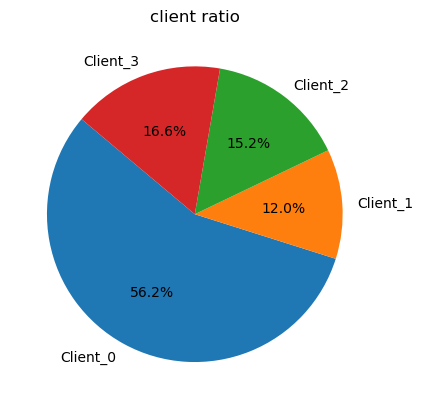

In [58]:
import matplotlib.pyplot as plt

# 데이터
labels = ['Client_0', 'Client_1', 'Client_2', 'Client_3']
sizes = [37413, 7980, 10080, 11060]

# 파이 차트 그리기
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# 제목 추가
plt.title('client ratio')

# 차트 보여주기
plt.show()